In [1]:

import os 
import pickle 
import evaluate_predictions
import matplotlib.pyplot as plt

datapath = "../data/efficiency_test/"

In [2]:

inputs = {
    "coref": "output_nocoref",
    "nocoref": "output"
}

data = {}
for k, filename in inputs.items():
    with open(f"{datapath}{filename}.pickle", "rb") as file:
        data[k] = pickle.load(file)



1. Compare predictions

In [3]:
for version, d in data.items():
    print(f"Evaluating predictions for {version}")
    evaluate_predictions.evaluate(d["predictions"])

Evaluating predictions for coref
Results: PMD RMD FMD PEL REL FEL: 97.4% 61.9% 75.7% | 65.7% 41.7% 51.0%
Evaluating predictions for nocoref
Results: PMD RMD FMD PEL REL FEL: 97.4% 61.8% 75.7% | 65.8% 41.7% 51.1%


2. Compare time 
- histogram, boxplot, difference by dataset

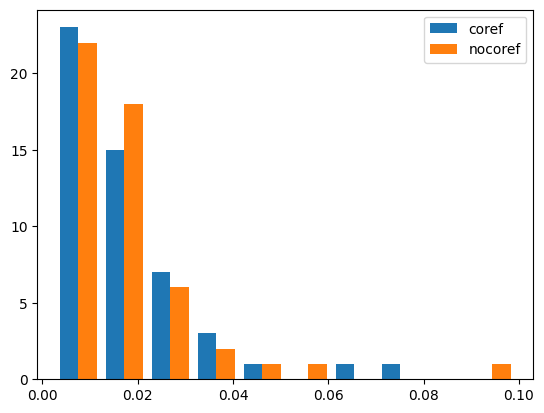

In [4]:
fig, ax = plt.subplots()

x = [v["timing"] for v in data.values()]

lbl = list(data.keys())
ax.hist(x, label=lbl)

ax.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


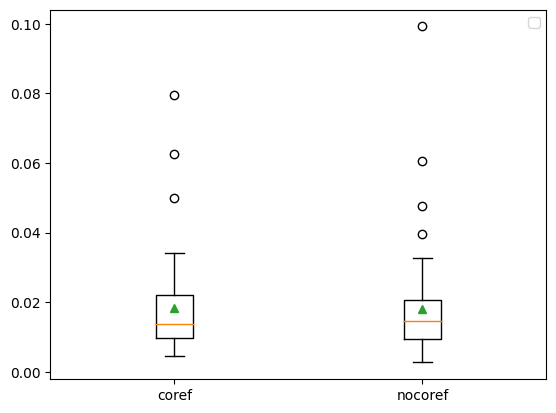

In [5]:
fig, ax = plt.subplots()

x = [v["timing"] for v in data.values()]

lbl = list(data.keys())
ax.boxplot(x, showmeans=True, labels=lbl)

ax.legend()




Text(0.5, 0, '(coref - nocoref)/coref')

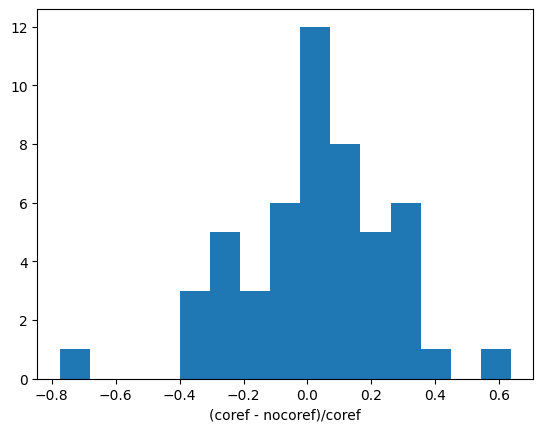

In [6]:
# timing difference by dataset

timings = {k: data[k]["timing"] for k in list(data.keys())}

coref_minus_nocoref = [(timings["coref"][i] - timings["nocoref"][i])/timings["coref"][i] for i in range(len(timings["coref"]))]


fig, ax = plt.subplots()
ax.hist(coref_minus_nocoref, bins=15)
ax.set_xlabel("(coref - nocoref)/coref")
